In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = pd.read_csv(r'E:\Download\2019机器学习sklearn课堂\rankingcard.csv', index_col=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [7]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 去除重复值 

In [8]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [10]:
#由于删除之后索引仍保持不变，因而需要重新赋予值
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


## 填补缺失值 

In [11]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [12]:
data.NumberOfDependents.fillna(data.NumberOfDependents.mean(), inplace=True)

In [14]:
#均值填补家属人数
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [121]:
#使用随机森林填补月收入的缺失值
def fill_x(data, to_fill):
    df = data.copy()
    fill = df.loc[:, to_fill]
    df = df.iloc[:, df.columns != to_fill]

    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index, :]
    Xtest = df.iloc[Ytest.index, :]
    
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain, Ytrain)
    Ypred = rfr.predict(Xtest)
    return Ypred

In [124]:
y_pred = fill_x(data, 'MonthlyIncome')

In [142]:
data.loc[data.MonthlyIncome.isnull(), 'MonthlyIncome'] = y_pred

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


## 处理异常值
使用箱线图或者3sigma法则

In [146]:
#描述性统计,查看0.01等等处的分布
data.describe([.01, 0.1, .25, .5, .75, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,4985.100000,329664.0
MonthlyIncome,149391.0,5427.757184,13254.149276,0.0,0.0,0.180000,1800.000000,4426.000000,7416.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [147]:
(data.age == 0).sum()

1

In [150]:
#删掉age为0的异常值
data = data[data.age != 0]

In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149390.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149390.0,6.071121,250.264509,0.0,0.030132,0.154234,0.556491,50708.0
age,149390.0,52.306587,14.725390,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149390.0,0.393882,3.852966,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149390.0,354.439110,2041.850084,0.0,0.177441,0.368233,0.875294,329664.0
MonthlyIncome,149390.0,5427.753353,13254.193555,0.0,1800.000000,4426.000000,7416.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149390.0,8.480909,5.136528,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149390.0,0.238122,3.826177,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149390.0,1.022384,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149390.0,0.212504,3.810536,0.0,0.000000,0.000000,0.000000,98.0


In [154]:
data[data.loc[:, 'NumberOfTimes90DaysLate'] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,1407.207720,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,2528.860000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2384.546635,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,12.160000,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,552.160000,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.000000


In [156]:
data.NumberOfTimes90DaysLate.value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [158]:
data = data[data.NumberOfTimes90DaysLate < 90]

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [160]:
data.index = range(data.shape[0])

## 处理样本不均衡 

In [165]:
(data[data.iloc[:, 0] == 0]).shape

(139292, 11)

In [171]:
(data[data.iloc[:, 0] == 1]).shape

(9873, 11)

In [168]:
data.iloc[:, 0].value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [173]:
#查看两种分别占的比例
n_sample = data.shape[0]

n0_sample = data.iloc[:, 0].value_counts()[0]
n1_sample = data.iloc[:, 1].value_counts()[1]
print('样本个数：{}；1占{:.2%}；0占{:.2%}'.format(n_sample, n1_sample/n_sample, n0_sample/n_sample))

样本个数：149165；1占0.01%；0占93.38%


In [174]:
#可以看出来样本严重不均衡，因而采用上采样的方法
import imblearn

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


In [175]:
from imblearn.over_sampling import SMOTE

In [179]:
sm = SMOTE(random_state=42)
X = data.iloc[:, data.columns != 'SeriousDlqin2yrs']
y = data.SeriousDlqin2yrs[:, np.newaxis]

In [181]:
X, y = sm.fit_sample(X, y)

X.shape[0]

278584

In [183]:
pd.Series(y).value_counts()

1    139292
0    139292
dtype: int64

In [185]:
data.SeriousDlqin2yrs.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

## 分成训练集和测试集合

In [187]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=.3, random_state=420)

model_data = pd.concat([Ytrain, Xtrain], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

valid_data = pd.concat([Ytest, Xtest], axis=1)
valid_data.index = range(valid_data.shape[0])
valid_data.columns = data.columns

In [189]:
model_data.to_csv(r'E:\Download\2019机器学习sklearn课堂\model_data.csv')
valid_data.to_csv(r'E:\Download\2019机器学习sklearn课堂\valid_data.csv')

## 分箱 

In [190]:
#pd.qcut 基于分位数分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [192]:
model_data.qcut #索引以及其对应的箱子

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [194]:
model_data.qcut.value_counts()

(36.0, 39.0]      12690
(20.999, 28.0]    11744
(58.0, 61.0]      11406
(48.0, 50.0]      11100
(46.0, 48.0]      10991
(31.0, 34.0]      10845
(50.0, 52.0]      10549
(43.0, 45.0]      10348
(61.0, 64.0]      10167
(39.0, 41.0]       9818
(52.0, 54.0]       9687
(41.0, 43.0]       9681
(28.0, 31.0]       9491
(74.0, 107.0]      9097
(64.0, 68.0]       8902
(54.0, 56.0]       8729
(68.0, 74.0]       8684
(56.0, 58.0]       7879
(34.0, 36.0]       7522
(45.0, 46.0]       5678
Name: qcut, dtype: int64

In [193]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [199]:
#计算每个箱中标签为0，1出现的次数
count_y0 = model_data[model_data.SeriousDlqin2yrs==0].groupby('qcut').count().SeriousDlqin2yrs
count_y1 = model_data[model_data.SeriousDlqin2yrs==1].groupby('qcut').count().SeriousDlqin2yrs

In [200]:
#得到箱上下限
[*zip(updown, updown[1:])]

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 34.0),
 (34.0, 36.0),
 (36.0, 39.0),
 (39.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 46.0),
 (46.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 107.0)]

In [235]:
#箱的个数
num_bins = [*zip(updown, updown[1: ], count_y0, count_y1)]

In [204]:
num_bins[0][2:]

(21.0, 28.0, 4243, 7501)

## 计算WOE和IV来衡量 

In [205]:
columns = ['min', 'max', 'count_0', 'count_1']
df = pd.DataFrame(num_bins, columns=columns)

In [207]:
df['total'] = df.count_0 + df.count_1
df["percent"] = df.total / df.total.sum()
df["bad_rate"] = df.count_1 / df.total
df["good%"] = df.count_0 / df.count_0.sum()
df["bad%"] = df.count_1 / df.count_1.sum()
df["woe"] = np.log(df["good%"] / df["bad%"])

In [208]:
df.head()

,min,max,count_0,count_1,total,percent,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7501,11744,0.060223,0.638709,0.043433,0.077078,-0.573602
1,28.0,31.0,3571,5920,9491,0.048670,0.623749,0.036554,0.060832,-0.509327
2,31.0,34.0,4075,6770,10845,0.055613,0.624251,0.041713,0.069566,-0.511466
3,34.0,36.0,2908,4614,7522,0.038573,0.613401,0.029767,0.047412,-0.465465
4,36.0,39.0,5182,7508,12690,0.065074,0.591647,0.053045,0.077150,-0.374614


In [209]:
IV = np.sum((df["good%"] - df["bad%"]) * df.woe)

In [210]:
IV

0.35531649161611084

In [211]:
def get_woe(num_bins):
    columns = ['min', 'max', 'count_y0', 'count_y1']
    df = pd.DataFrame(num_bins, columns=columns)
    
    df["total"] = df["count_y0"] + df["count_y1"]
    df["percent"] = df["total"] / df["total"].sum()
    df["bad_rate"] = df["count_y1"] / df["total"]
    df["good%"] = df["count_y0"] / df["count_y0"].sum()
    df["bad%"] = df["count_y1"] / df["count_y1"].sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

In [213]:
def get_iv(df):
    return np.sum(df.woe * (df["good%"] - df["bad%"]))

In [214]:
get_iv(get_woe(num_bins))

0.35531649161611084

## 卡方检验，合并箱体，画出IV曲线 
对于两个相邻的箱体，检测其相似度，若p高，则合并两箱体

(4243, 7501)


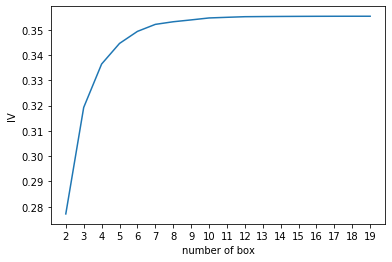

In [225]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy
IV = []
axisx = []
print(num_bins_[0][2:])
while len(num_bins_) > 2:
    pvs = []
    
    for i in range(len(num_bins_) - 1):
        
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1, x2])[1]
        pvs.append(pv)
        
    i = pvs.index(max(pvs))
        
    num_bins_[i: i+2] = [(
        num_bins_[i][0]
        , num_bins_[i+1][1]
        , num_bins_[i][2] + num_bins_[i+1][2]
        , num_bins_[i][3] + num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

plt.figure()
plt.plot(axisx, IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [228]:
#用最佳分箱个数进行分箱
def get_bin(num_bins_, n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_) - 1):
            x1 = num_bins_[i][2:4]
            x2 = num_bins_[i+1][2:4]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        
        num_bins_[i:i+2] = [(
            num_bins_[i][0]
            ,num_bins_[i][1]
            ,num_bins_[i][2] + num_bins_[i+1][2]
            ,num_bins_[i][3] + num_bins_[i+1][3]
            )]
    return num_bins_

In [237]:
num_bins__ = num_bins.copy()
afterbins = get_bin(num_bins__, 6)

In [238]:
afterbins

[(21.0, 28.0, 14797, 24805),
 (36.0, 39.0, 39070, 51472),
 (54.0, 56.0, 15743, 12271),
 (61.0, 64.0, 6968, 3199),
 (64.0, 68.0, 13376, 4210),
 (74.0, 107.0, 7737, 1360)]

In [239]:
bins_df = get_woe(afterbins)
bins_df

,min,max,count_y0,count_y1,total,percent,bad_rate,good%,bad%,woe
0,21.0,28.0,14797,24805,39602,0.203079,0.626357,0.151467,0.254889,-0.520457
1,36.0,39.0,39070,51472,90542,0.464299,0.568488,0.399934,0.528911,-0.279519
2,54.0,56.0,15743,12271,28014,0.143656,0.438031,0.161151,0.126093,0.245321
3,61.0,64.0,6968,3199,10167,0.052136,0.314645,0.071327,0.032872,0.774654
4,64.0,68.0,13376,4210,17586,0.090181,0.239395,0.136922,0.043261,1.152164
5,74.0,107.0,7737,1360,9097,0.046649,0.149500,0.079199,0.013975,1.734694


## 包装函数来对所有特征分箱 

In [248]:
def graphforbestbin(DF, X, Y, n=5, q=20, graph=True):
    import pandas as pd
    import numpy as np
    import scipy
    df = DF[[X, Y]].copy()
    #利用pandas中的qcut函数进行分箱
    df["qcut"], bins = pd.qcut(df[X], retbins=True, q=q, duplicates='drop')
    
    coount_y0 = df.loc[df[Y]==0].groupby("qcut").count()[Y]
    coount_y1 = df.loc[df[Y]==1].groupby("qcut").count()[Y]
    num_bins = [*zip(bins, bins[1:], coount_y0, coount_y1)]
    
    #箱子中的0和1的个数不应该出现0
    #在保证第一行中既有0又有1的情况下，检验后面余下行
    #向前合并
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
            num_bins[0][0]
            ,num_bins[1][1]
            ,num_bins[0][2] + num_bins[1][2]
            ,num_bins[0][3] + num_bins[1][3]
            )]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0]
                    ,num_bins[i][1]
                    ,num_bins[i-1][2] + num_bins[i][2]
                    ,num_bins[i-1][3] + num_bins[i][3]
                    )]
                break
            else:
                break
    def get_woe(num_bins):
        columns = ['min', 'max', 'count_y0', 'count_y1']
        df = pd.DataFrame(num_bins, columns=columns)
        df['total'] = df.count_y0 + df.count_y1
        df['percentage'] = df.total / df.total.sum()
        df['bad_rate'] = df.count_y1 / df.total
        df['good%'] = df.count_y0 / df.count_y0.sum()
        df['bad%'] = df.count_y1 / df.count_y1.sum()
        df['woe'] = np.log(df['good%'] / df['bad%'])
        
        return df
    def get_iv(df):
        return np.sum((df['good%'] - df['bad%']) * df.woe)
    
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins) - 1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
        num_bins[i][0]
        ,num_bins[i+1][1]
        ,num_bins[i][2] + num_bins[i+1][2]
        ,num_bins[i][3] + num_bins[i+1][3]
        )]
        
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(bins_df))
        IV.append(get_iv(bins_df))
        
        
    if graph:
        plt.figure()
        plt.plot(axisx, IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

RevolvingUtilizationOfUnsecuredLines


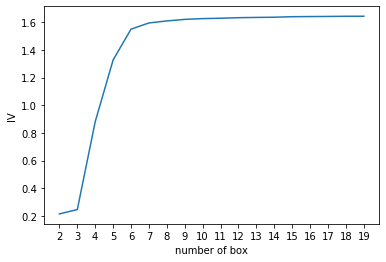

age


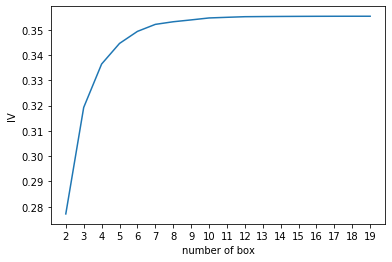

NumberOfTime30-59DaysPastDueNotWorse


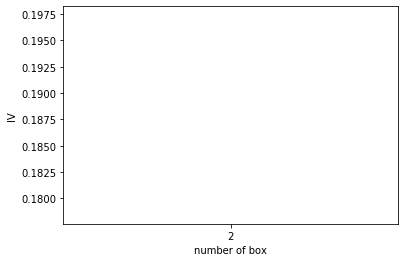

DebtRatio


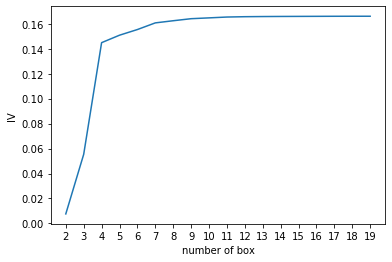

MonthlyIncome


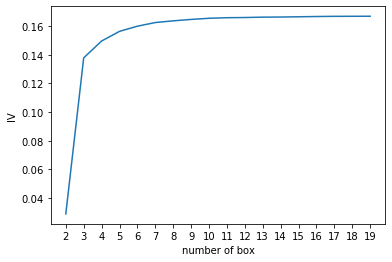

NumberOfOpenCreditLinesAndLoans


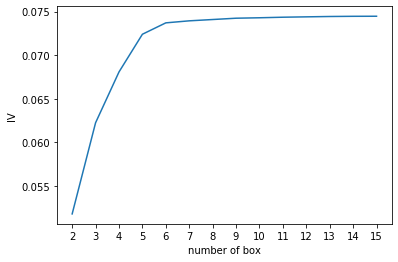

NumberOfTimes90DaysLate


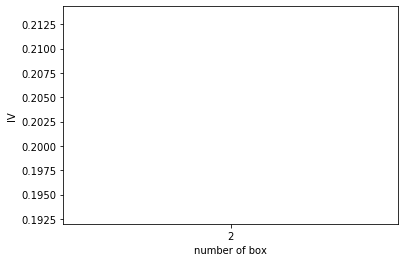

NumberRealEstateLoansOrLines


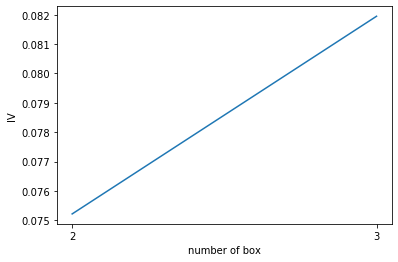

NumberOfTime60-89DaysPastDueNotWorse


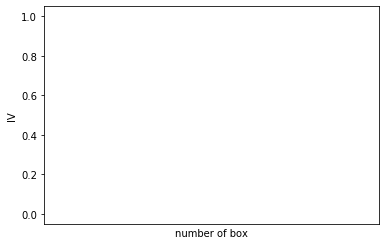

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [249]:
for i in model_data.columns[1: -1]:
    print(i)
    graphforbestbin(model_data, i, "SeriousDlqin2yrs", n=2, q=20)

In [251]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
    "age":5,
    "DebtRatio":4,
    "MonthlyIncome":3,
    "NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
    ,"NumberOfTimes90DaysLate":[0,1,2,17]
    ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
    ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
    ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
    ,"SeriousDlqin2yrs"
    ,n=auto_col_bins[col]
#使用字典的性质来取出每个特征所对应的箱的数量
    ,q=20
    ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
#保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [253]:
bins_of_col.update(hand_bins)

In [256]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.099056963,
  0.29797080393412695,
  0.6403948106600063,
  0.9825075245118169,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017302200850000005,
  0.5033673562282015,
  1.4718297260033157,
  inf],
 'MonthlyIncome': [-inf, 0.10597839533279214, 5598.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 已经获得了分箱，将原数据进行分箱，映射

In [279]:
a = model_data[['age', 'SeriousDlqin2yrs']]
a["cut"] = pd.cut(a['age'], bins_of_col['age'])#利用分箱来对a中列进行分箱

a.groupby("cut")['SeriousDlqin2yrs'].value_counts().unstack()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24805
"(36.0, 54.0]",39070,51472
"(54.0, 61.0]",15743,12271
"(61.0, 74.0]",20344,7409
"(74.0, inf]",7737,1360


In [277]:
def get_woe(df, col, y, bins):
    df = df[[col, y]].copy() #这里要[[]]才能取出复数个列
    df["cut"] = pd.cut(df[col], bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()#转换成类似DataFrame表格形式
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1] / bins_df[1].sum()))
    return woe

woeall = {} #用来储存所有woe的字典
for col in bins_of_col:
    woeall[col] = get_woe(model_data, col, "SeriousDlqin2yrs", bins_of_col[col])

In [278]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.201896
 (0.0991, 0.298]    0.669887
 (0.298, 0.64]     -0.390725
 (0.64, 0.983]     -1.260348
 (0.983, 1.0]      -0.479918
 (1.0, inf]        -2.033450
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.520457
 (36.0, 54.0]   -0.279519
 (54.0, 61.0]    0.245321
 (61.0, 74.0]    1.006255
 (74.0, inf]     1.734694
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0173]     1.498112
 (0.0173, 0.503]   -0.010288
 (0.503, 1.472]    -0.471715
 (1.472, inf]       0.175196
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.106]      1.411034
 (0.106, 5598.0]   -0.236873
 (5598.0, inf]      0.231884
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.852017
 (1.0, 3.0]    -0.330686
 (3.0, 5.0]    -0.055384
 (5.0, 17.0]    0.125414
 (17.0, inf]    0.456154
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351511
 (0.0, 1.0]    -0.871332
 (1.0, 2.0]    -1.374712
 (2.0, inf]    -1.540520
 dtype

## WOE映射到原始数据中 

In [296]:
model_woe = pd.DataFrame(index=model_data.index)

In [282]:
model_woe["woe"] = pd.cut(model_data["age"], bins_of_col["age"]).map(woeall["age"])
model_woe

,woe
0,-0.279519
1,1.006255
2,-0.279519
3,1.006255
4,-0.279519
...,...
195003,-0.520457
195004,-0.279519
195005,-0.279519
195006,1.006255


In [297]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])

In [298]:
model_woe["SeriousDlqin2yrs"] = model_data.SeriousDlqin2yrs
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.201896,-0.279519,-0.010288,-0.236873,-0.055384,0.351511,0.235955,-0.391354,0.124511,0.659231,0
1,0.669887,1.006255,-0.010288,-0.236873,-0.055384,0.351511,0.235955,-0.391354,0.124511,0.659231,0
2,-2.033450,-0.279519,-0.010288,-0.236873,-0.055384,-0.871332,-1.754181,-0.391354,-1.764785,-0.476786,1
3,2.201896,1.006255,-0.471715,-0.236873,0.125414,0.351511,0.235955,0.613224,0.124511,0.659231,0
4,-0.390725,-0.279519,-0.010288,0.231884,0.125414,0.351511,0.235955,0.613224,0.124511,-0.511604,1


## 对测试集进行分箱 

In [299]:
vali_woe = pd.DataFrame(index=valid_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(valid_data[col], bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = valid_data.SeriousDlqin2yrs

In [300]:
vali_x = vali_woe.iloc[:, :-1]
vali_y = vali_woe.iloc[:, -1]

In [301]:
x = model_woe.iloc[:, :-1]
y = model_woe.iloc[:, -1]

In [302]:
from sklearn.linear_model import LogisticRegression as LR

In [303]:
x.shape

(195008, 10)

In [309]:
lr = LR().fit(x, y)
lr.score(vali_x, vali_y)

0.7892217861587059

In [305]:
lr.score(x, y)

0.7860805710534953

## ROC曲线
捕捉少数类曲线

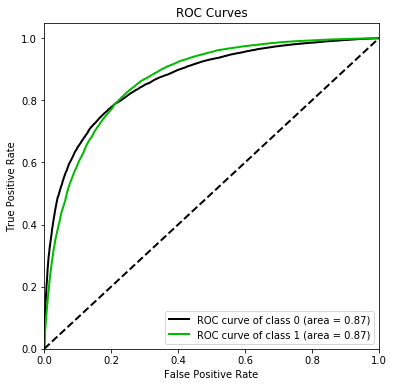

In [311]:
import scikitplot as skp
valid_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skp.metrics.plot_roc(vali_y, valid_proba_df,
    plot_micro=False,figsize=(6,6),
    plot_macro=False)